In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('./ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
df = df.drop(columns=['User ID','Gender'])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


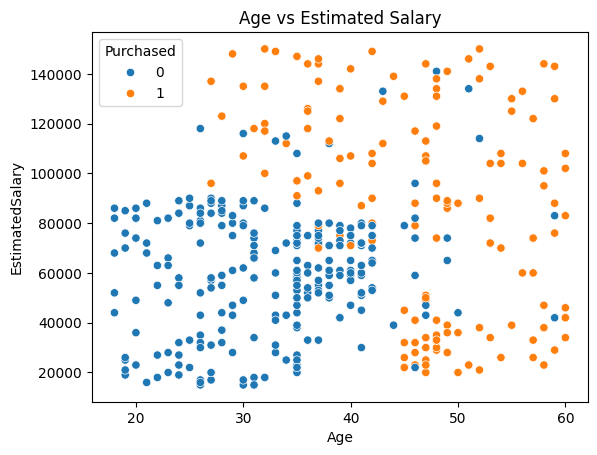

In [24]:
plot = sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)
plt.title('Age vs Estimated Salary')
plt.show()

In [25]:
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

X[0:5]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


### Why Use StandardScaler Here?
Logistic Regression is sensitive to feature scales, especially if features vary widely (like Age in years vs Salary in thousands).

StandardScaler transforms the features to have:

Mean = 0

Standard deviation = 1

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X[0:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
model = clf.fit(X_train, Y_train)


In [33]:
print(Y_test.values)
y_pred = model.predict(X_test)
y_pred

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1]


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

### Confusion Matrix

Actual\Predicted | 0 (Not Purchased) | 1 (Purchased) 

0 (Not Purchased) | True Negative (TN) | False Positive (FP)

1 (Purchased)      | False Negative (FN) | True Positive (TP)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))


[[61  2]
 [12 25]]


### Classification Report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



### Accuracy Score

In [39]:
print(accuracy_score(y_test, y_pred))

0.86


### Decision Boundry Plot

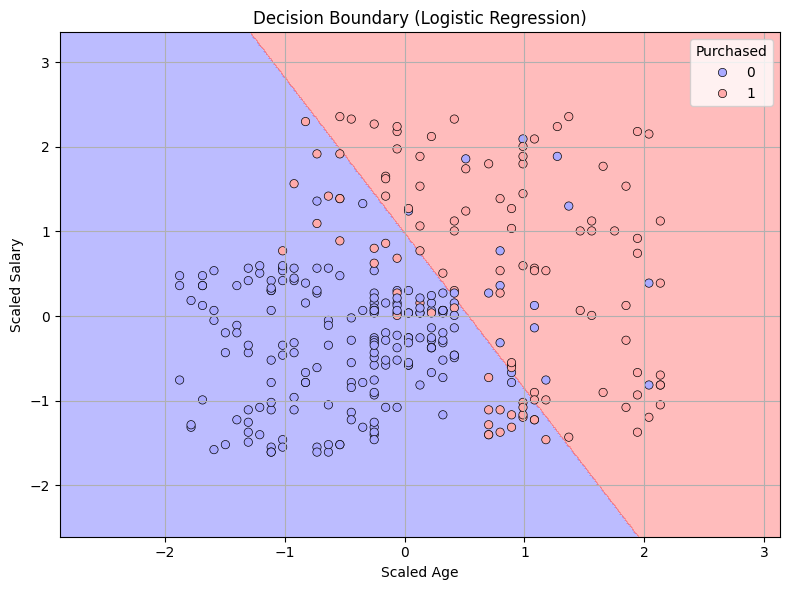

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = X_train
y = y_train

# Step 1: Create mesh grid over feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 2: Flatten grid, predict for every point
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

# Step 3: Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

# Step 4: Overlay Seaborn scatterplot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='bwr', edgecolor='k')

# Labels and title
plt.title('Decision Boundary (Logistic Regression)')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Salary')
plt.legend(title='Purchased')
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
clf.predict(scaler.transform([[19,40000]]))


c:\Users\Admin\Documents\GitHub\Dartvolution\dartland\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])